## Prep

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.display.max_rows = 100

In [2]:
mesa = pd.read_csv('../data_processed/MESA/mesa_raw.csv')

In [3]:
mesa_bla = mesa[mesa['race'] == 3]

In [4]:
jhs_raw = pd.read_csv('../data_processed/JHS/jhs_raw.csv')

## Missing values

In [ ]:
mesa 

In [ ]:
mesa.isnull().sum()

## Outcome

In [ ]:
mesa_outcome = mesa[['cvda','cvdatt']]

mesa_bla_outcome = mesa_bla[['cvda','cvdatt']]

jhs_outcome = jhs_outcome_full[['event','time']].copy()

In [ ]:
plt.hist(jhs_outcome['time'][jhs_outcome['event'] == 1], bins=10, alpha=0.5, label='JHS Event Time')
plt.hist(mesa_outcome['cvdatt'][mesa_outcome['cvda'] == 1], bins=10, alpha=0.5, label='MESA Event Time')
plt.hist(mesa_bla_outcome['cvdatt'][mesa_bla_outcome['cvda'] == 1], bins=10, alpha=0.5, label='MESA_bla Event Time')

# Set axis labels and legend
plt.xlabel('Time')
plt.ylabel('Frequency of Events')
plt.legend()

# Show the plot
plt.title('Distribution of Event Times for JHS and MESA')
plt.show()

In [ ]:
sns.kdeplot(jhs_outcome['time'][jhs_outcome['event'] == 1], label='JHS', color='blue')
sns.kdeplot(mesa_outcome['cvdatt'][mesa_outcome['cvda'] == 1], label='MESA', color='red')
sns.kdeplot(mesa_bla_outcome['cvdatt'][mesa_bla_outcome['cvda'] == 1], label='MESA_bla', color='green')

# Set axis labels and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.title('Density Plot of Event Time')
plt.show()


In [ ]:
plt.hist(jhs_outcome_full['time_12'], bins=10, alpha=0.5, label='V2 time')
plt.hist(jhs_outcome_full['time_13'], bins=10, alpha=0.5, label='V3 time')


# Set axis labels and legend
plt.xlabel('Time')
plt.ylabel('Frequency of Events')
plt.legend()

# Show the plot
plt.title('Distribution of JHS Visit time')
plt.show()

### by dif time period

In [ ]:
jhs_in_5y = jhs_outcome_full[jhs_outcome_full['time_12'] <= 365*5]

# retrieve subjects with time_12>365*5 & y2=0
# recode as y=0 at t=365*5
sub = jhs_outcome_full[(jhs_outcome_full['time_12'] > 365*5) & (jhs_outcome_full['y2']==0)]  ## n=770

# how to deal w subjects with time_12>365*5 & y3=1?
sub2 = jhs_outcome_full[(jhs_outcome_full['time_12'] > 365*6.6) & (jhs_outcome_full['y2']==1)] 

## nb features

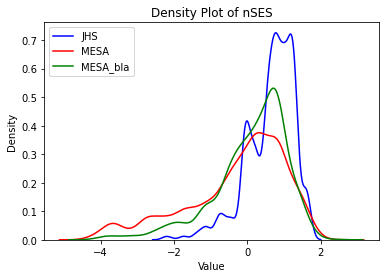

In [5]:
sns.kdeplot(jhs_raw['nSES'], label='JHS', color='blue')
sns.kdeplot(mesa['nSES'], label='MESA', color='red')
sns.kdeplot(mesa_bla['nSES'], label='MESA_bla', color='green')

# Set axis labels and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.title('Density Plot of nSES')
plt.show()


In [7]:
print(mesa['nSES'].mean())
print(mesa['nSES'].var())

-0.285556644967502
1.8596374058927758


In [8]:
print(mesa_bla['nSES'].mean())
print(mesa_bla['nSES'].var())

0.09213842453750752
1.0315340504987316


In [9]:
print(jhs_raw['nSES'].mean())
print(jhs_raw['nSES'].var())

0.63529527559055
0.4237912102946651


## ind exposures

In [ ]:
plt.hist([jhs_covar['nutrition3cat'], mesa['chdiet'], mesa_bla['chdiet']], bins=[0, 1, 2, 3], alpha=0.5,
         label=['JHS', 'MESA', 'MESA Bla'])

# Set axis labels and legend
plt.xlabel('Categorization')
plt.ylabel('Frequency')
plt.legend()

tick_positions = [0, 1, 2]
tick_labels = ['poor', 'intermediate', 'ideal']
plt.xticks([pos + 0.5 for pos in tick_positions], tick_labels)


# Show the plot
plt.title('Nutrition')
plt.show()

In [ ]:
## income

plt.hist([jhs_covar['fmlyinc'], mesa['income'], mesa_bla['income']], bins=[ 1, 2, 3,4,5], alpha=0.5, label=['JHS', 'MESA', 'MESA Bla'])

# Set axis labels and legend
plt.ylabel('Frequency')
plt.legend()

tick_positions = [ 1, 2,3,4]
tick_labels = ['$0-11,999', '$12,000-24,999', '$25,000-74,999','$75,000+']
plt.xticks([pos + 0.5 for pos in tick_positions], tick_labels)


# Show the plot
plt.title('Family Income')
plt.show()

## Covariates

In [ ]:
# continuous covariates

sns.kdeplot(jhs_covar['age'], label='JHS', color='blue')
sns.kdeplot(mesa['age'], label='MESA', color='red')
sns.kdeplot(mesa_bla['age'], label='MESA bla', color='green')

# Set axis labels and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.title('Density Plot of Baseline age')
plt.show()


In [ ]:
# race

mesa['race'].value_counts()

In [ ]:
# gender

plt.hist([jhs_covar['sex'], mesa['sex'], mesa_bla['sex']], bins=[0, 1, 2, 3], alpha=0.5, 
         label=['JHS', 'MESA', 'MESA Bla'])

# Set axis labels and legend
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.legend()

# Move the x-axis labels towards the right
tick_positions = [0.5, 1.5]
tick_labels = ['female', 'male']
plt.xticks(tick_positions, tick_labels)

# Show the plot
plt.title('Histogram of Sex')
plt.show()

In [ ]:
# binary covariates

plt.hist([jhs_covar['alc'], mesa['cural'], mesa_bla['cural']], bins=[0, 1, 2, 3], alpha=0.5, 
         label=['JHS', 'MESA', 'MESA Bla'])

# Set axis labels and legend
plt.xlabel('Diabetes status')
plt.ylabel('Frequency')
plt.legend()

# Move the x-axis labels towards the right
tick_positions = [0.5, 1.5]
tick_labels = ['1', '0']
plt.xticks(tick_positions, tick_labels)

# Show the plot
plt.title('Histogram of Alcohol Status')
plt.show()